# Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import missingno as msno
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

## Data Import

In [2]:
df_train = pd.read_csv('./train.csv')
print(df_train.shape)
df_train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_test = pd.read_csv('./test.csv')
print(df_test.shape)
df_test.head()

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


- PassengerId : 승객 ID
- HomePlanet : 출발 행성(거주지)
- CryoSleep - 취침 방식 여부
- Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)
- Destination : 목적지
- Age : 승객의 나이
- VIP : 승객의 VIP 서비스 유무
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액
- Name : 이름
- Transported : 이동 여부

- Train 에는 Transported가 있고 test에는 Trasported가 없다.
- 당연 transported 가 Target변수임. 

In [4]:
df_train.info()

# 아 널값 뭐야

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


둘 다 null값 관리가 필요할 것 같다.

<AxesSubplot:>

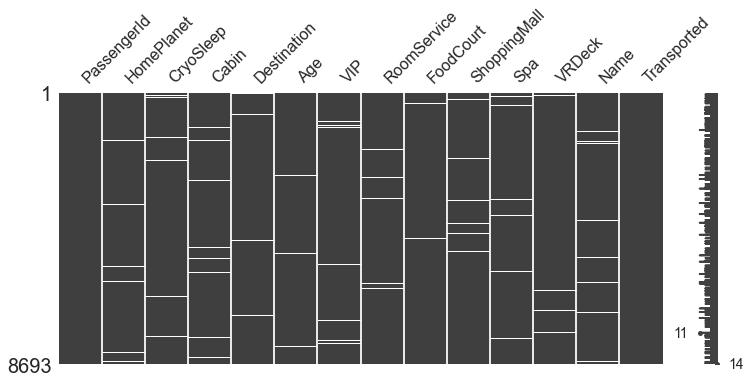

In [6]:
# train 데이터의 missing value
msno.matrix(df_train, figsize = (12,5))

In [7]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

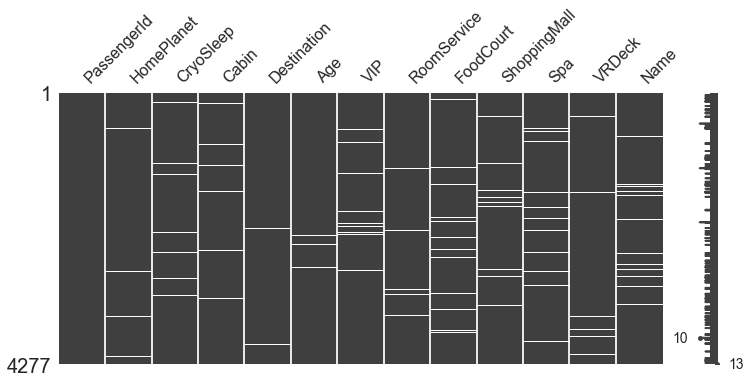

In [8]:
# test data 의 missing value
msno.matrix(df_test, figsize = (12,5))

In [9]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
df_train.describe()

# 0세는 뭔데 신생아인가..
# RoomService, Foodcourt ,shoppingmall, spa, vrdeck 등 기타 편의시설은 거의 0.
# 이용이 거의 없다고 볼 수 있다.

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
df_train.describe(include=['O']) #범주형 데이터 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [12]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [13]:
df_test.describe(include=['O']) #범주형 데이터 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


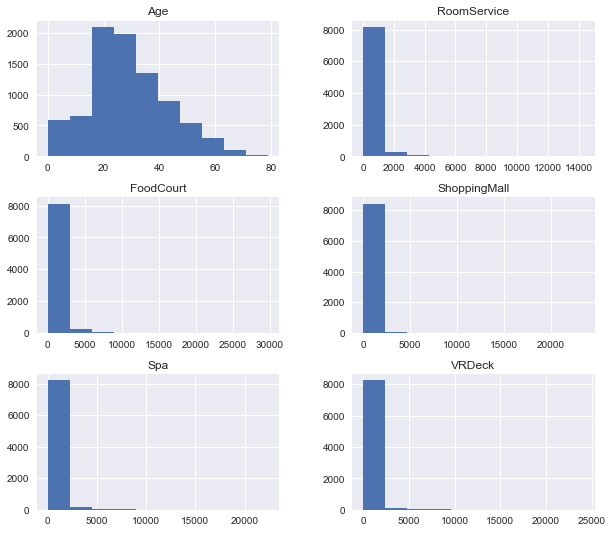

In [14]:
df_train.hist(figsize = (10,9))
plt.show()

거의 0에 몰려있어서 대부분의 승객들이 서비스를 이용하지 않지만, 서비스를 이용하는 소수의 사람들은 금액을 많이 사용한 것으로 유추할 수 있다. Max 값이 크기 때문

## 전처리 

In [15]:
# 결측치 처리
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(0) # 최빈값인 0으로 대체
df_train['VIP'] = df_train['VIP'].fillna(0) # 최빈값인 0으로 대체 -> 둘 다 Bull형임
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])

In [16]:
df_train['HomePlanet'] = df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0])
df_train['Destination'] = df_train['Destination'].fillna(df_train['Destination'].mode()[0])
df_train['ShoppingMall'] = df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].median())
df_train['VRDeck'] = df_train['VRDeck'].fillna(df_train['VRDeck'].median())
df_train['FoodCourt'] = df_train['FoodCourt'].fillna(df_train['FoodCourt'].median())
df_train['Spa'] = df_train['Spa'].fillna(df_train['Spa'].median())
df_train['RoomService'] = df_train['RoomService'].fillna(df_train['RoomService'].median())
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

- 결측치의 비중이 5% 내외였다.
- CryoSleep, VIP, HomePlanet, Cabin, Destination 등 bool형이나 object형은 최빈값으로 전처리
- 이 외 수치형 데이터는 중앙값으로 전처리.
- 예외값에 영향을 거의 받지 않기 때문에 중앙값으로 선정

In [17]:
# Cabin 분할
cab = df_train['Cabin'].apply(lambda x:x.split("/"))

df_train['Cab_1'] = cab.apply(lambda x: x[0])
df_train['Cab_3'] = cab.apply(lambda x: x[2])
df_train['Cab_2'] = cab.apply(lambda x: float(x[1]))

df_train

# / 로 나누어진 데이터를 분할했다. 영문자, 숫자로 분할

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cab_1,Cab_3,Cab_2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P,98.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S,1499.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S,1500.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S,608.0


In [18]:
# 필요없는 column drop
df_train.drop(['PassengerId', "Name", 'Cabin'], axis= 1, inplace = True)

# cabin은 위에서 분할해서 사용하기 때문에 drop, ID와 Name은 도착여부랑 상관없기 때문에 drop

In [19]:
# bool형을 int로 변경
df_train['VIP'] = df_train['VIP'].astype(int)
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)

In [20]:
# 결측치 확인
df_train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cab_1           0
Cab_3           0
Cab_2           0
dtype: int64

## VIP

In [21]:
df_train[['VIP', 'Transported']].groupby(['VIP'], as_index = False).mean().sort_values(by='Transported')

,VIP,Transported
1,1,0.381910
0,0,0.506475


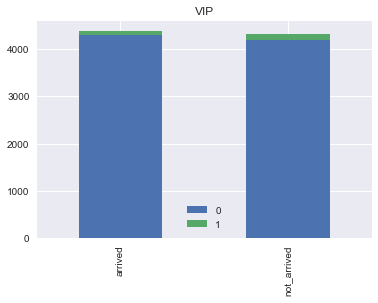

In [22]:
arrived = df_train[df_train['Transported'] == 1]['VIP'].value_counts()
not_arrived = df_train[df_train['Transported'] == 0]['VIP'].value_counts()
df = pd.DataFrame([arrived , not_arrived])
df. index = ['arrived', 'not_arrived']
df. plot(kind = 'bar', stacked = True, figsize = (6,4))
plt.title("VIP")
plt.show()

VIP 중 제대로 도착한 사람들이 신청한 사람들 중에선 38%
신청하지 않은 사람들이 50%이다.
그래프로 봤을 때 차이가 있으나 신청을 하지 않은 사람의 비중이 압도적으로 많으므로
유의하다고 보기는 어렵다

## CryoSleep

In [23]:
df_train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index = False).mean().sort_values(by = 'Transported')

,CryoSleep,Transported
0,0,0.335042
1,1,0.817583


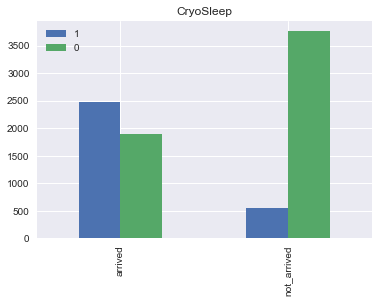

In [24]:
arrived = df_train[df_train['Transported'] == 1]['CryoSleep']. value_counts()
not_arrived = df_train[df_train['Transported'] == 0]['CryoSleep'].value_counts()
df = pd.DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df.plot(kind = 'bar', stacked = False, figsize = (6,4))
plt.title("CryoSleep")
plt.show()

Cryosleep 을 신청한 사람 중 80%가 도착한 것을 봐서 어느정도 관계가 있다.
- 신청하지 않은 사람이 많지만 신청한 사람들중에서는 대부분이 arrived

## HomePlanet

In [25]:
df_train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index = False).mean().sort_values(by='Transported')

,HomePlanet,Transported
0,Earth,0.427649
2,Mars,0.523024
1,Europa,0.658846


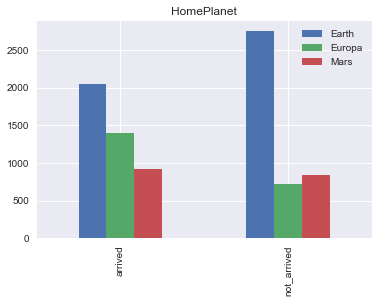

In [26]:
arrived = df_train[df_train['Transported'] == 1]['HomePlanet']. value_counts()
not_arrived = df_train[df_train['Transported'] == 0]['HomePlanet']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df.index = ['arrived','not_arrived']
df.plot(kind= 'bar',stacked= False , figsize= (6,4))
plt.title('HomePlanet')
plt. show()

- 출발행성은 지구가 가장 많다.
- 하지만 화성과 유로파에서 출발한 인원은 절반 이상이 이동됐다

## Destination

In [27]:
df_train[['Destination', 'Transported']].groupby(['Destination'], as_index = False).mean().sort_values(by = 'Transported')

,Destination,Transported
2,TRAPPIST-1e,0.472199
1,PSO J318.5-22,0.503769
0,55 Cancri e,0.610000


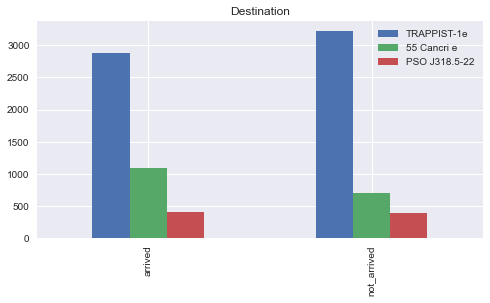

In [28]:
arrived = df_train[df_train['Transported'] == 1]['Destination'].value_counts()
not_arrived = df_train[df_train['Transported']==0]['Destination'].value_counts()
df = pd.DataFrame([arrived, not_arrived])
df.index = ['arrived', 'not_arrived']
df.plot(kind = 'bar', stacked = False, figsize = (8,4))
plt.title("Destination")
plt.show()

In [29]:
df

,TRAPPIST-1e,55 Cancri e,PSO J318.5-22
arrived,2879,1098,401
not_arrived,3218,702,395


도착지는 대부분 약 50%에 가깝지만,55 Cancri e가 도착지인 경우 다른 도착지보다 10% 더 높은 것을 알 수 있다.

## Age

In [30]:
df_train.loc[(df_train['Age'] >= 0) & (df_train['Age'] < 10), 'Age'] = 0
df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] < 20), 'Age'] = 10
df_train.loc[(df_train['Age'] >= 20) & (df_train['Age'] < 30), 'Age'] = 20
df_train.loc[(df_train['Age'] >= 30) & (df_train['Age'] < 40), 'Age'] = 30
df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] < 50), 'Age'] = 40
df_train.loc[(df_train['Age'] >= 50) & (df_train['Age'] < 60), 'Age'] = 50
df_train.loc[(df_train['Age'] >= 60) & (df_train['Age'] < 70), 'Age'] = 60
df_train.loc[(df_train['Age'] >= 70) & (df_train['Age'] < 80), 'Age'] = 70

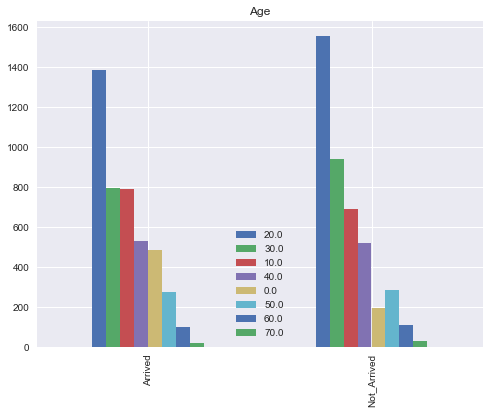

In [31]:
Arrived = df_train[df_train['Transported'] == 1]['Age'].value_counts()
Not_Arrived = df_train[df_train['Transported'] == 0 ]['Age'].value_counts()
df = pd.DataFrame([Arrived, Not_Arrived])
df. index = ['Arrived', 'Not_Arrived']
df.plot(kind = 'bar', stacked = False, figsize = (8,6)).legend (loc = 'lower center')
plt.title("Age")
plt.show()

In [32]:
df

,20.0,30.0,10.0,40.0,0.0,50.0,60.0,70.0
Arrived,1386,796,788,531,483,275,99,20
Not_Arrived,1555,939,691,517,196,282,109,26


- 20대가 가장 많이 도착하고 도착하지도 못했다.. 수가 가장 많음
- 0~10대는 도착률이 더 높고 30대는 도착하지 못한 확률이 더많다.
- 나머지는 비슷한 비율

## Cabin

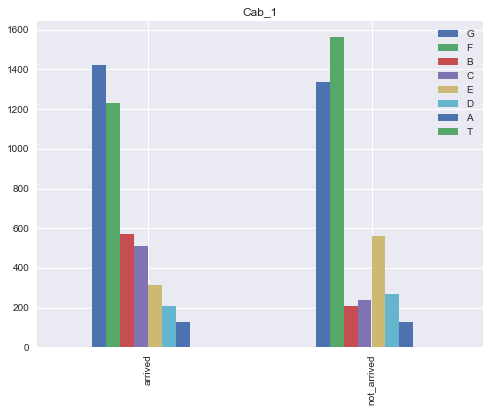

In [33]:
arrived = df_train[df_train['Transported'] == 1]['Cab_1']. value_counts()
not_arrived = df_train[df_train['Transported'] == 0]['Cab_1']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,6))
plt.title('Cab_1')
plt. show()

- G로 시작하는 그룹은 도착을 조금 더 많이 했다.
- F 그룹은 도착 못한 확률이 높다.
- B,C는 도착한 확률이 더 높고
- E는 눈에 띄게 도착을 못 한 확률이 더 높다.
- D는 도착을 조금 더 많이 했고
- A는 비슷

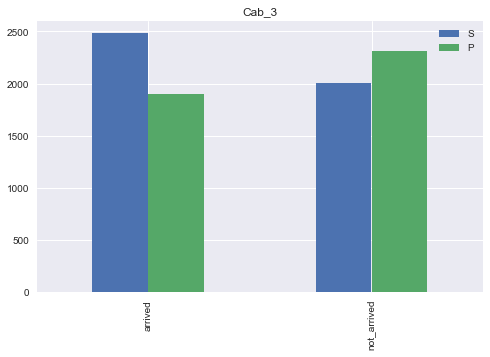

In [34]:
arrived = df_train[df_train['Transported'] == 1]['Cab_3']. value_counts()
not_arrived = df_train[df_train['Transported'] == 0]['Cab_3']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,5))
plt.title('Cab_3')
plt. show()

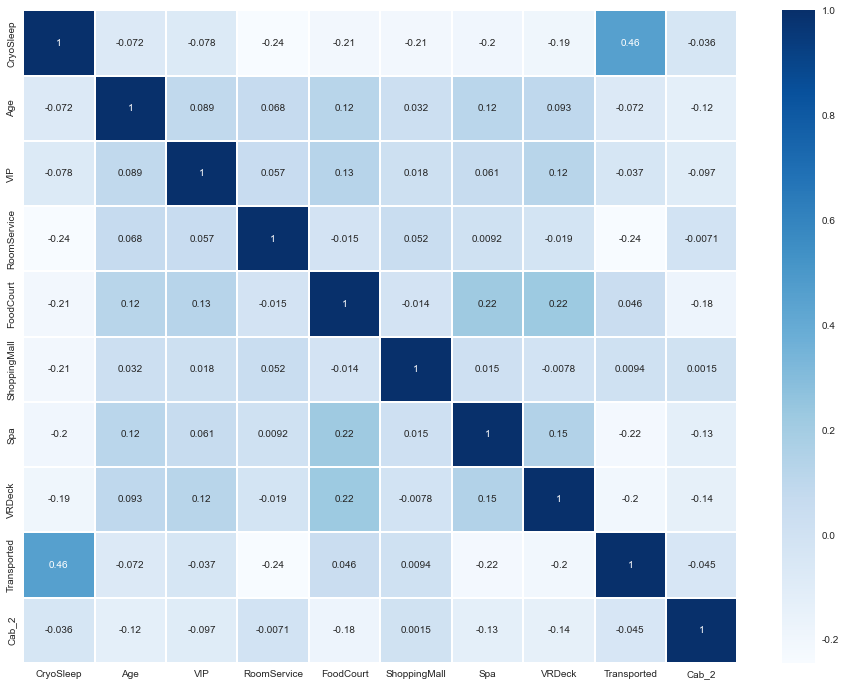

In [35]:
plt.figure(figsize = (16, 12))
x = sns.heatmap(df_train.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

수치형 데이터를 heatmap 을 통해 시각화.
- Cryosleep과 상관관계가 있어보이나, 이 또한 0.5 이하로 데이터가 선형성이 없는 것을 알 수 있다.

## One Hot Encoding

In [36]:
# OneHotEncoding 을 사용하여 범주형을 수치형으로 변환
input_data = df_train.drop(['Transported'], axis=1)
encoding_train_data = pd.get_dummies(input_data)
encoding_train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_2,HomePlanet_Earth,...,Cab_1_A,Cab_1_B,Cab_1_C,Cab_1_D,Cab_1_E,Cab_1_F,Cab_1_G,Cab_1_T,Cab_3_P,Cab_3_S
0,0,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,20.0,0,109.0,9.0,25.0,549.0,44.0,0.0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,50.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,30.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,10.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,40.0,1,0.0,6819.0,0.0,1643.0,74.0,98.0,0,...,1,0,0,0,0,0,0,0,1,0
8689,1,10.0,0,0.0,0.0,0.0,0.0,0.0,1499.0,1,...,0,0,0,0,0,0,1,0,0,1
8690,0,20.0,0,0.0,0.0,1872.0,1.0,0.0,1500.0,1,...,0,0,0,0,0,0,1,0,0,1
8691,0,30.0,0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
encoding_train_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cab_2', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cab_1_A',
       'Cab_1_B', 'Cab_1_C', 'Cab_1_D', 'Cab_1_E', 'Cab_1_F', 'Cab_1_G',
       'Cab_1_T', 'Cab_3_P', 'Cab_3_S'],
      dtype='object')

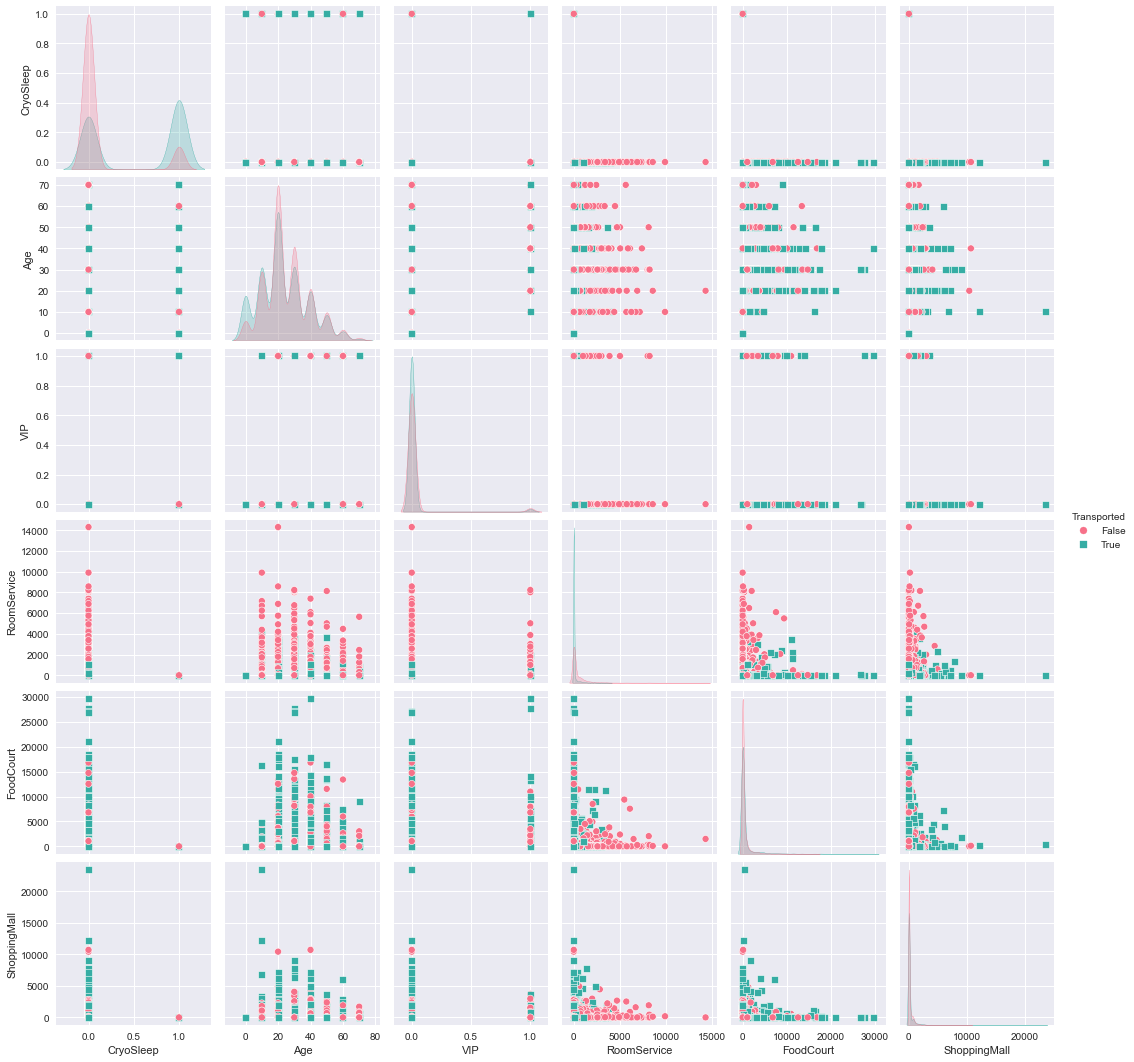

In [38]:
# 추가 데이터 확인
analysis = pd.merge(encoding_train_data, df_train['Transported'], left_index = True, right_index = True )
sns.pairplot(analysis[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Transported']]
                     ,hue = 'Transported', palette='husl', markers = ['o','s',])
plt.show()

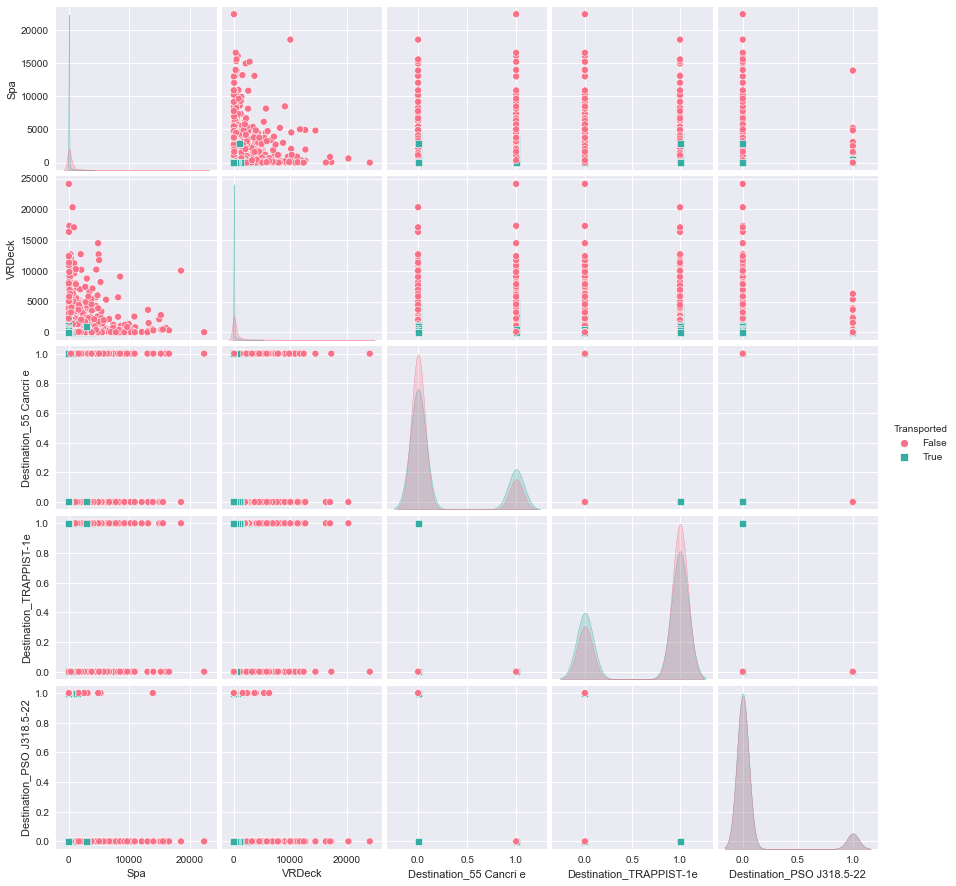

In [39]:
sns.pairplot(analysis[['Spa', 'VRDeck', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

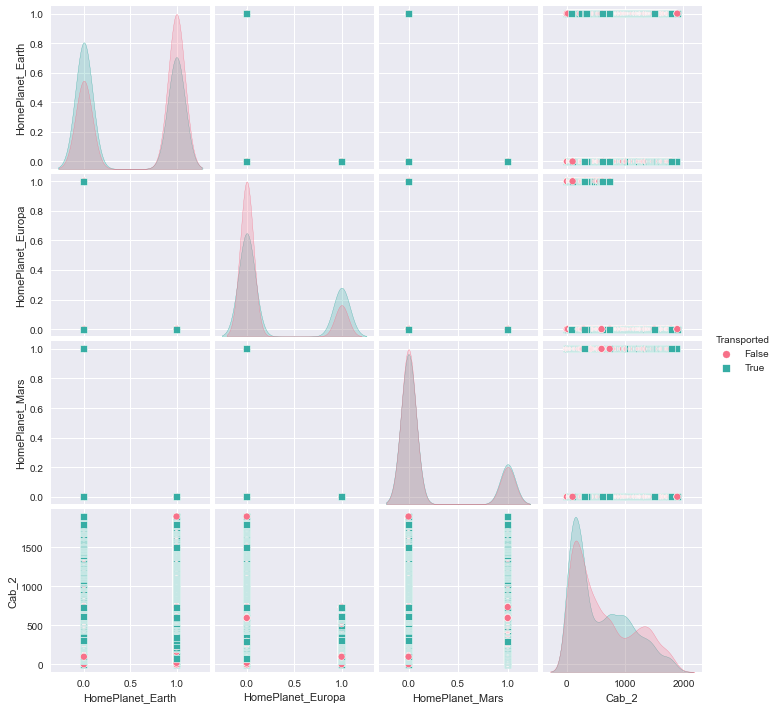

In [41]:
sns.pairplot(analysis[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cab_2',
                      'Transported']],hue = 'Transported',palette='husl',markers = ['o','s'])
plt.show()

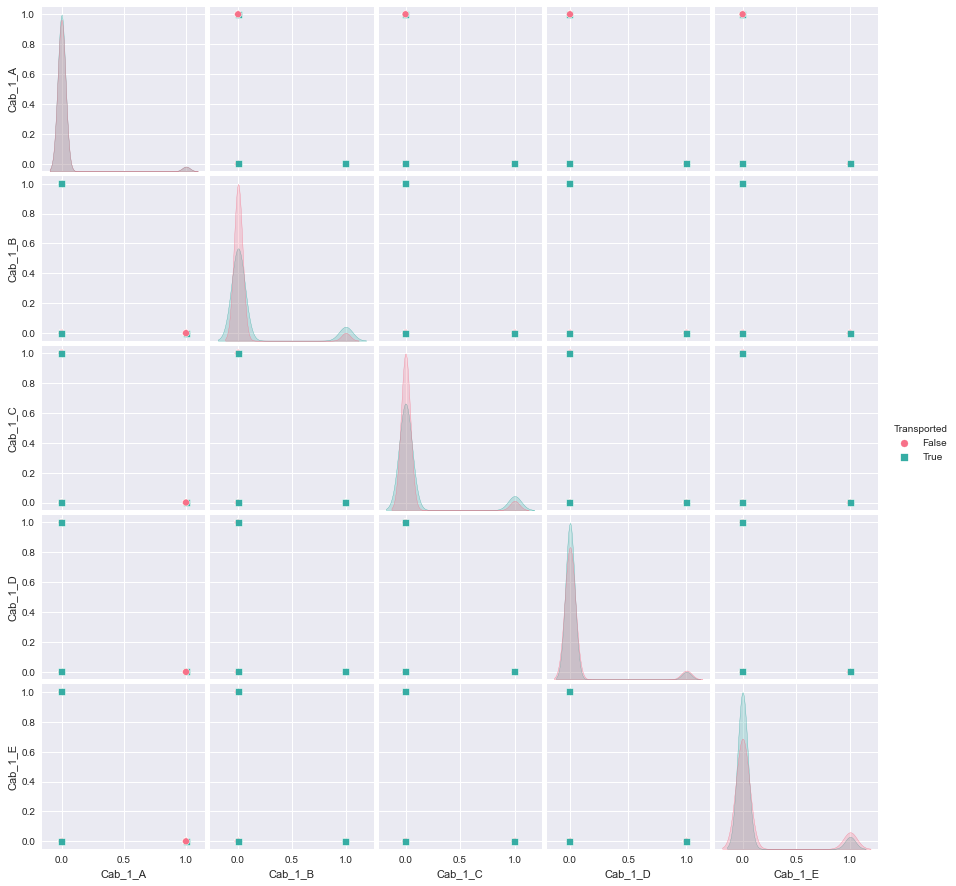

In [42]:
sns.pairplot(analysis[['Cab_1_A',"Cab_1_B",'Cab_1_C','Cab_1_D','Cab_1_E','Transported']],
                      hue = 'Transported', palette='husl',markers = ['o','s'])
plt.show()

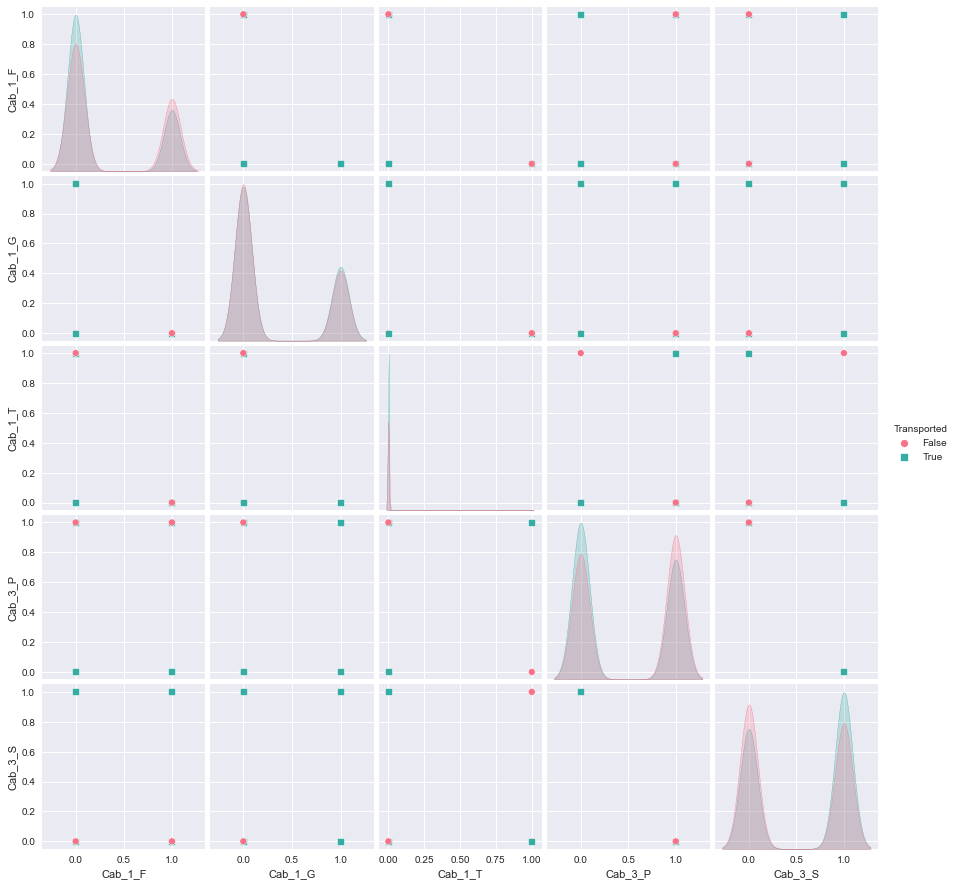

In [44]:
sns.pairplot(analysis[['Cab_1_F',"Cab_1_G",'Cab_1_T',"Cab_3_P",'Cab_3_S',"Transported"]],
            hue = 'Transported', palette = 'husl', markers = ['o','s'])
plt.show()

## Model 적용

### PCA적용 RandomforestClassifier

In [53]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
y_target = df_train['Transported']
x_data = encoding_train_data.drop(['Cab_1_A','Cab_1_G','Cab_1_T','Cab_1_D','Cab_1_C','VIP',
                                  'HomePlanet_Mars','Destination_PSO J318.5-22'],axis=1)

pca = PCA(n_components = 10)
pca.fit(x_data)
pca_train_data = pca.transform(x_data)
pca_train_data

pca_cols = []
for i in range(0,10) :
    x = 'pca_col' + str(i)
    pca_cols.append(x)
pca_cols
pca_df = pd.DataFrame(pca_train_data, columns = pca_cols)
pca_df

,pca_col0,pca_col1,pca_col2,pca_col3,pca_col4,pca_col5,pca_col6,pca_col7,pca_col8,pca_col9
0,-535.348014,-188.719070,-27.403605,-245.550426,-117.238760,-653.537322,5.382608,-0.750134,0.013792,-0.674743
1,-364.458686,174.659093,351.457673,-144.055864,-124.735190,-625.823824,-5.382794,0.561324,-0.989320,0.534854
2,4601.925026,2538.927710,4854.954126,-308.602209,-180.207682,-199.064550,16.124593,0.588640,-0.533539,-0.257880
3,1609.039014,1476.551940,2291.397327,-211.094736,214.339994,-444.477792,0.793221,0.641367,-0.331263,-0.416536
4,-318.082931,132.972380,397.172084,73.583653,-48.130517,-620.134669,-15.779606,0.573014,-0.952301,0.493447
...,...,...,...,...,...,...,...,...,...,...
8688,6177.768784,-1848.035887,1045.852620,-222.920852,-92.462325,-162.517473,9.244590,-0.780101,0.701429,0.407575
8689,-638.379929,-249.961014,-24.086388,-272.009104,-105.953168,840.430318,-10.683260,0.785252,0.664748,0.046920
8690,-646.567950,-232.941992,6.041270,170.492551,1712.649260,835.558285,-1.968389,0.777153,-0.154124,-0.070736
8691,1397.582192,1789.267065,-1956.461335,-201.672837,-103.007043,175.833522,3.724757,0.762209,0.903432,0.190469


- 이전 단게에서 유사한 feature을 drop을 했지만, 대다수 유사한 형태의 feature 가 있었기 때문에 pca를 통해 feature를 줄이고 overfitting을 방지하기 위해 pca사용.
- feature를 5~15개를 확인해본 결과 10개가 적당하다는 결론이 나와 10개로 pca진행

In [83]:
x_train, x_test, y_train, y_test = train_test_split(pca_df, y_target, test_size = 0.2, random_state= 0)

In [84]:
params = { 'n_estimators' : [50,100,200,300,400],
            'max_depth' : [4,6,8,10,12,16],
            'min_samples_leaf' : [4,8,12,16,20], # 과적합제어
            'min_samples_split' : [4,8,12,16,20] # 과적합 제어
         }
grid_re_clf = RandomForestClassifier(random_state = 5, n_jobs = -1)
grid_cv = GridSearchCV(grid_re_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train,y_train)

print("최적 하이퍼 파라미터 : ",grid_cv.best_params_)
print("최고 예측 정확도 : {:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 300}
최고 예측 정확도 : 0.7972


In [85]:
# 모델 학습
pca_model = RandomForestClassifier(n_estimators = 100, random_state = 5,
                                  max_depth = 10, min_samples_leaf = 16,
                                  min_samples_split = 4, oob_score = True)
pca_model.fit(x_train,y_train)

pred = pca_model.predict(x_test)

# 평가
print("훈련 세트 정확도 : {:.3f}".format(pca_model.score(x_train, y_train)) )
print("테스트 세트 정확도 : {:.3f}".format(pca_model.score(x_test, y_test)) )
print("OOB 샘플의 정확도 : {:.3f}".format(pca_model.oob_score_) )

훈련 세트 정확도 : 0.832
테스트 세트 정확도 : 0.792
OOB 샘플의 정확도 : 0.792


In [86]:
y_target = df_train['Transported']
x_data = encoding_train_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.15, random_state = 0)

'''
params = { 'n_estimators' : [50, 100, 200, 300, 400],
           'max_depth' : [4, 6, 8, 10, 12, 16],
           'min_samples_leaf' : [4, 8, 12, 16, 20], #과적합 제어
           'min_samples_split' : [4, 8, 12, 16, 20] #과적합 제어
         }

grid_re_clf = RandomForestClassifier(random_state = 5, n_jobs = -1)
grid_cv = GridSearchCV(grid_re_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
'''

"\nparams = { 'n_estimators' : [50, 100, 200, 300, 400],\n           'max_depth' : [4, 6, 8, 10, 12, 16],\n           'min_samples_leaf' : [4, 8, 12, 16, 20], #과적합 제어\n           'min_samples_split' : [4, 8, 12, 16, 20] #과적합 제어\n         }\n\ngrid_re_clf = RandomForestClassifier(random_state = 5, n_jobs = -1)\ngrid_cv = GridSearchCV(grid_re_clf, param_grid = params, cv = 5, n_jobs = -1)\ngrid_cv.fit(x_train, y_train)\n\nprint('최적 하이퍼 파라미터: ', grid_cv.best_params_)\nprint('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))\n"

In [89]:
# 모델 학습
model = RandomForestClassifier(n_estimators = 200, random_state=5, 
                               max_depth = 16, min_samples_leaf = 8, 
                               min_samples_split = 4, oob_score=True)
model.fit(x_train, y_train)

pred = model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 0.848
테스트 세트 정확도: 0.806
OOB 샘플의 정확도: 0.802


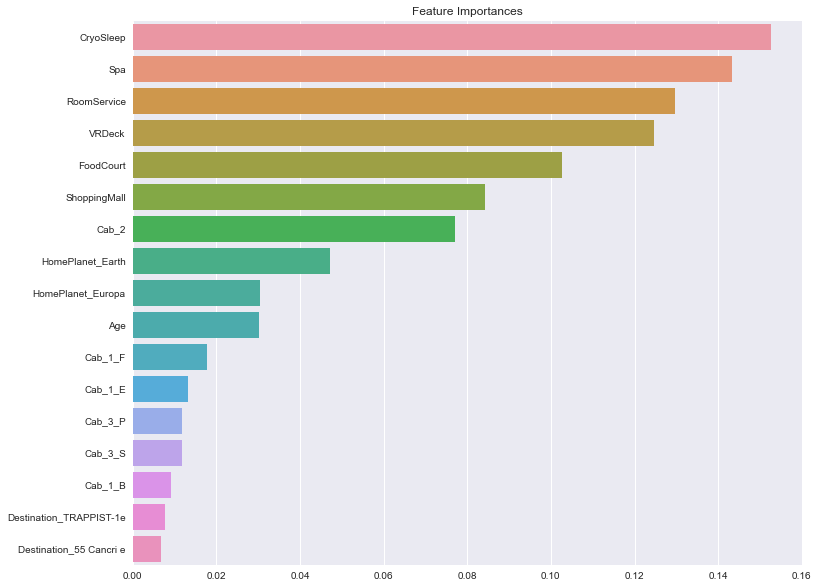

In [72]:
# feature importance

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_sort = ftr_importances.sort_values(ascending = False)

plt.figure(figsize = (12,10))
plt.title("Feature Importances")
sns.barplot(x=ftr_sort, y=ftr_sort.index)
plt.show()

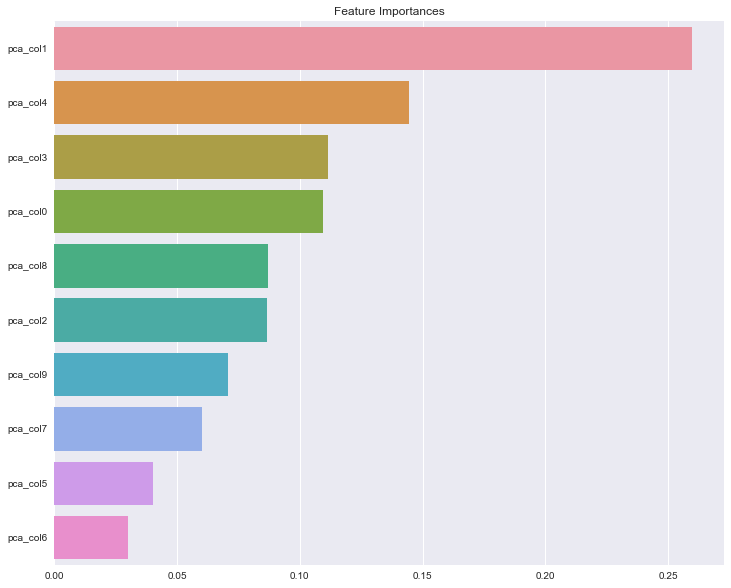

In [68]:
# feature importance

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_sort = ftr_importances.sort_values(ascending = False)

plt.figure(figsize = (12,10))
plt.title("Feature Importances")
sns.barplot(x=ftr_sort, y=ftr_sort.index)
plt.show()

## Test Data 적용

In [74]:
df_test.isna().sum() #데이터 결측치 확인

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [76]:
# 결측치 처리
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(0)
df_test['VIP'] = df_test['VIP'].fillna(0)
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].mode()[0])
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median())
df_test['VRDeck'] = df_test['VRDeck'].fillna(df_test['VRDeck'].median())
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(df_test['FoodCourt'].median())
df_test['Spa'] = df_test['Spa'].fillna(df_test['Spa'].median())
df_test['RoomService'] = df_test['RoomService'].fillna(df_test['RoomService'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [77]:
# Cabin 분할
cab = df_test["Cabin"].apply(lambda x: x.split("/"))

df_test["Cab_1"] = cab.apply(lambda x: x[0])
df_test["Cab_3"] = cab.apply(lambda x: x[2])
df_test["Cab_2"] = cab.apply(lambda x: float(x[1]))

In [78]:
#필요 없는 column drop
df_test.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

In [79]:
# bool형 int로 변경
df_test["VIP"] = df_test["VIP"].astype(int)
df_test["CryoSleep"] = df_test["CryoSleep"].astype(int)

In [80]:
encoding_test_data = pd.get_dummies(df_test)
test_x_data = encoding_test_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)

In [81]:
pca = PCA(n_components = 10)
pca.fit(encoding_test_data)
pca_test_data = pca.transform(encoding_test_data)

pca_cols = []
for i in range(0, 10) :
    x = 'pca_col' + str(i)
    pca_cols.append(x)
pca_df = pd.DataFrame(pca_test_data, columns = pca_cols)

pca_rf_pred = pca_model.predict(pca_df)
pca_rf_pred

sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['Transported'] = pca_rf_pred
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

array([False, False, False, ..., False,  True, False])

In [ ]:
rf_predict = model.predict(test_x_data)

sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['Transported'] = rf_predict
sample_submission.to_csv('CKH_submission_2.csv',index = False)
sample_submission.head()